In [59]:
#importing all packages we need for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random
from IPython.display import display, Markdown, Latex

In [69]:
#getting the data 
churn_df=pd.read_csv("Data/train (1).csv")
test_df=pd.read_csv("Data/test (1).csv")

In [70]:
churn_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [71]:
churn_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [72]:
churn_df.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

In [73]:
churn_df.last_date_of_month_6

0        6/30/2014
1        6/30/2014
2        6/30/2014
3        6/30/2014
4        6/30/2014
           ...    
69994    6/30/2014
69995    6/30/2014
69996    6/30/2014
69997    6/30/2014
69998    6/30/2014
Name: last_date_of_month_6, Length: 69999, dtype: object

In [74]:
percent_missing = churn_df.isnull().sum() * 100 / len(churn_df)
missing_value_df = pd.DataFrame({'column_name': churn_df.columns,
                                 'percent_missing': percent_missing})

In [75]:
missing_value_df.sort_values('percent_missing', inplace=True, ascending= False)

In [76]:
pd.set_option('display.max_rows', 200)
missing_value_df

,column_name,percent_missing
arpu_3g_6,arpu_3g_6,74.902499
count_rech_2g_6,count_rech_2g_6,74.902499
night_pck_user_6,night_pck_user_6,74.902499
arpu_2g_6,arpu_2g_6,74.902499
date_of_last_rech_data_6,date_of_last_rech_data_6,74.902499
total_rech_data_6,total_rech_data_6,74.902499
av_rech_amt_data_6,av_rech_amt_data_6,74.902499
max_rech_data_6,max_rech_data_6,74.902499
count_rech_3g_6,count_rech_3g_6,74.902499
fb_user_6,fb_user_6,74.902499


In [68]:
def FixDate(arr):
    fx='%m/%d/%Y'
    out=pd.to_datetime(arr,format=fx)
    return out


In [77]:
#Since all the data is numeric except for the date we can grab all the date columns at once to fix them
DateList=list(churn_df.select_dtypes(['object']).columns)


In [78]:
DateList

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [79]:
# performing same operations on test data as on train data
for x in DateList:
    churn_df[x]=FixDate(churn_df[x])
    test_df[x]=FixDate(test_df[x])
churn_df.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype         
---   ------                    --------------  -----         
 0    id                        69999 non-null  int64         
 1    circle_id                 69999 non-null  int64         
 2    loc_og_t2o_mou            69297 non-null  float64       
 3    std_og_t2o_mou            69297 non-null  float64       
 4    loc_ic_t2o_mou            69297 non-null  float64       
 5    last_date_of_month_6      69999 non-null  datetime64[ns]
 6    last_date_of_month_7      69600 non-null  datetime64[ns]
 7    last_date_of_month_8      69266 non-null  datetime64[ns]
 8    arpu_6                    69999 non-null  float64       
 9    arpu_7                    69999 non-null  float64       
 10   arpu_8                    69999 non-null  float64       
 11   onnet_mou_6               67231 non-null  float64       
 12   on

### All Data types Fixed.

In [81]:
#since most of the missing data is in the recharge columns lets look at them 
amt_recharge_col =  churn_df.columns[churn_df.columns.str.contains('rech_amt|rech_data')]
churn_df.loc[:,amt_recharge_col].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,328.139788,322.376363,323.846355,104.569265,104.137573,107.540351,2.467612,2.679989,2.652441,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,404.211068,411.070120,426.181405,121.407701,120.782543,124.396750,2.794610,3.073472,3.101265,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,110.000000,100.000000,90.000000,30.000000,30.000000,30.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,229.000000,220.000000,225.000000,110.000000,110.000000,98.000000,1.000000,2.000000,1.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,438.000000,430.000000,436.000000,120.000000,128.000000,144.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,35190.000000,40335.000000,45320.000000,4010.000000,3299.000000,4449.000000,61.000000,54.000000,60.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


### Since we can see that the missing values are numeric and cannot have any caluculated value except 0 we can fill them with 0

In [82]:
for x in amt_recharge_col:
    churn_df[x]=churn_df[x].fillna(0)

In [83]:
percent_missing = churn_df.isnull().sum() * 100 / len(churn_df)
missing_value_df = pd.DataFrame({'column_name': churn_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending= False)
missing_value_df[missing_value_df.percent_missing>0]

,column_name,percent_missing
fb_user_6,fb_user_6,74.902499
count_rech_3g_6,count_rech_3g_6,74.902499
night_pck_user_6,night_pck_user_6,74.902499
arpu_2g_6,arpu_2g_6,74.902499
count_rech_2g_6,count_rech_2g_6,74.902499
arpu_3g_6,arpu_3g_6,74.902499
night_pck_user_7,night_pck_user_7,74.478207
arpu_3g_7,arpu_3g_7,74.478207
fb_user_7,fb_user_7,74.478207
arpu_2g_7,arpu_2g_7,74.478207


In [85]:
# Last date of month is common for all so filling those values with the last date value 
for x in ['last_date_of_month_7','last_date_of_month_8'] :
    churn_df[x].ffill(inplace=True)
    test_df[x].ffill(inplace=True)

In [86]:
churn_df[churn_df.max_rech_amt_7==0].info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8259 entries, 6 to 69988
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype         
---   ------                    --------------  -----         
 0    id                        8259 non-null   int64         
 1    circle_id                 8259 non-null   int64         
 2    loc_og_t2o_mou            7843 non-null   float64       
 3    std_og_t2o_mou            7843 non-null   float64       
 4    loc_ic_t2o_mou            7843 non-null   float64       
 5    last_date_of_month_6      8259 non-null   datetime64[ns]
 6    last_date_of_month_7      8259 non-null   datetime64[ns]
 7    last_date_of_month_8      8259 non-null   datetime64[ns]
 8    arpu_6                    8259 non-null   float64       
 9    arpu_7                    8259 non-null   float64       
 10   arpu_8                    8259 non-null   float64       
 11   onnet_mou_6               7180 non-null   float64       
 12   onn

In [87]:
# We can fill the missing data with 0 in all the cases 
churn_df.fillna(0,inplace=True)
test_df.fillna(0,inplace=True)

In [88]:
percent_missing = churn_df.isnull().sum() * 100 / len(churn_df)
missing_value_df = pd.DataFrame({'column_name': churn_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending= False)
missing_value_df[missing_value_df.percent_missing>0]

,column_name,percent_missing


### All missing values filled with 0 as they are all 0 value from what we undersand looking at the data 
### We can create new features from the given data 

In [89]:
#we can make a new column that is the total recharge value for data for each month this will help us get our high value customers
churn_df['total_rech_amt_data_6']=churn_df.total_rech_data_6*churn_df.av_rech_amt_data_6
churn_df['total_rech_amt_data_7']=churn_df.total_rech_data_7*churn_df.av_rech_amt_data_7
churn_df['total_rech_amt_data_8']=churn_df.total_rech_data_8*churn_df.av_rech_amt_data_8
test_df['total_rech_amt_data_6']=test_df.total_rech_data_6*test_df.av_rech_amt_data_6
test_df['total_rech_amt_data_7']=test_df.total_rech_data_7*test_df.av_rech_amt_data_7
test_df['total_rech_amt_data_8']=test_df.total_rech_data_8*test_df.av_rech_amt_data_8

<AxesSubplot:xlabel='churn_probability', ylabel='count'>

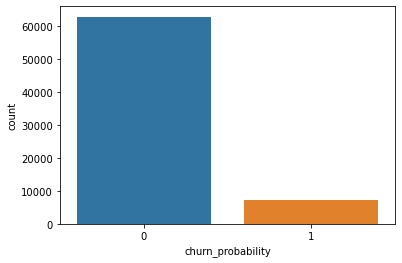

In [90]:
# Lets look at the churn rate 
sns.countplot(data=churn_df,x='churn_probability')

In [91]:
#% of churn 
churn_per=(len(churn_df[churn_df.churn_probability==1])/len(churn_df))
churn_per*100

10.188716981671167

### 10% of customers are expected to churn .
Lets break out the high value customers

In [92]:
churn_df['tot_rech']=(churn_df.total_rech_amt_6+churn_df.total_rech_amt_7+churn_df.total_rech_amt_8)+(churn_df.total_rech_amt_data_6+churn_df.total_rech_amt_data_7+churn_df.total_rech_amt_data_8)
churn_df['avg_rech']=churn_df['tot_rech']/3
test_df['tot_rech']=(test_df.total_rech_amt_6+test_df.total_rech_amt_7+test_df.total_rech_amt_8)+(test_df.total_rech_amt_data_6+test_df.total_rech_amt_data_7+test_df.total_rech_amt_data_8)
test_df['avg_rech']=test_df['tot_rech']/3


In [93]:
highval_cutoff=churn_df.avg_rech.quantile(0.7)

In [94]:
highval_cutoff

484.3333333333333

The high Value clients have a avg spending of $484 per month including the data and regular rechage 

In [95]:
highValue_df=churn_df[churn_df.avg_rech>484].copy()
len(highValue_df)

21001

we have 21001 high value customers in the data set 
Lets see how many of them are expected to churn 

In [96]:
len(highValue_df[highValue_df.churn_probability==1])

1257

There are 1257 peopel who are expected to churn who are high value customers of the service provieder 

# Dropping Columns
Lests look at the columns that can be dropped as they do not have any information in them

In [97]:
uni_count=pd.DataFrame(churn_df.nunique(axis=0))

In [98]:
uni_count.sort_values(0)

,0
std_ic_t2o_mou_8,1
std_ic_t2o_mou_6,1
std_og_t2c_mou_6,1
std_og_t2c_mou_7,1
std_og_t2c_mou_8,1
last_date_of_month_8,1
std_ic_t2o_mou_7,1
last_date_of_month_6,1
last_date_of_month_7,1
loc_og_t2o_mou,1


### we can drop all the columns that have 

In [99]:
drop_list=list(uni_count[uni_count[0]==1].index)

In [100]:
churn_df.drop(drop_list,inplace=True,axis=1)
test_df.drop(drop_list,inplace=True,axis=1)

In [102]:
display(churn_df.shape,test_df.shape) # Churn Prob is the only columnn not available in test

(69999, 164)

(30000, 163)

In [103]:
#ID can also be dropped as its only a primery key and has no addittional information
churn_df.drop('id',axis=1,inplace=True)
Test_id=test_df.id
test_df.drop('id',axis=1,inplace=True)

In [104]:
drop_list.append('id')# we need to maintain a list of dropped columns for test set 

In [105]:
highValue_df.drop(drop_list,axis=1,inplace=True)

In [106]:
# we can concider any column with less than 15 unique values as catagorical.
uni_count=pd.DataFrame(churn_df.nunique(axis=0))#need to restore as we dropped columns
catcols=list(uni_count[uni_count[0]<15].index)
catcols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'churn_probability']

In [107]:
num_cols=list(uni_count[uni_count[0]>15].index)
num_cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [115]:
from datetime import datetime

churn_df['Days_since_rech_7']=(churn_df['date_of_last_rech_data_7']-churn_df['date_of_last_rech_data_6']).dt.days

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

# EDA 
### Lest look at the data visually and see if we can find any strong relations 

#### We can focus on the high value customers

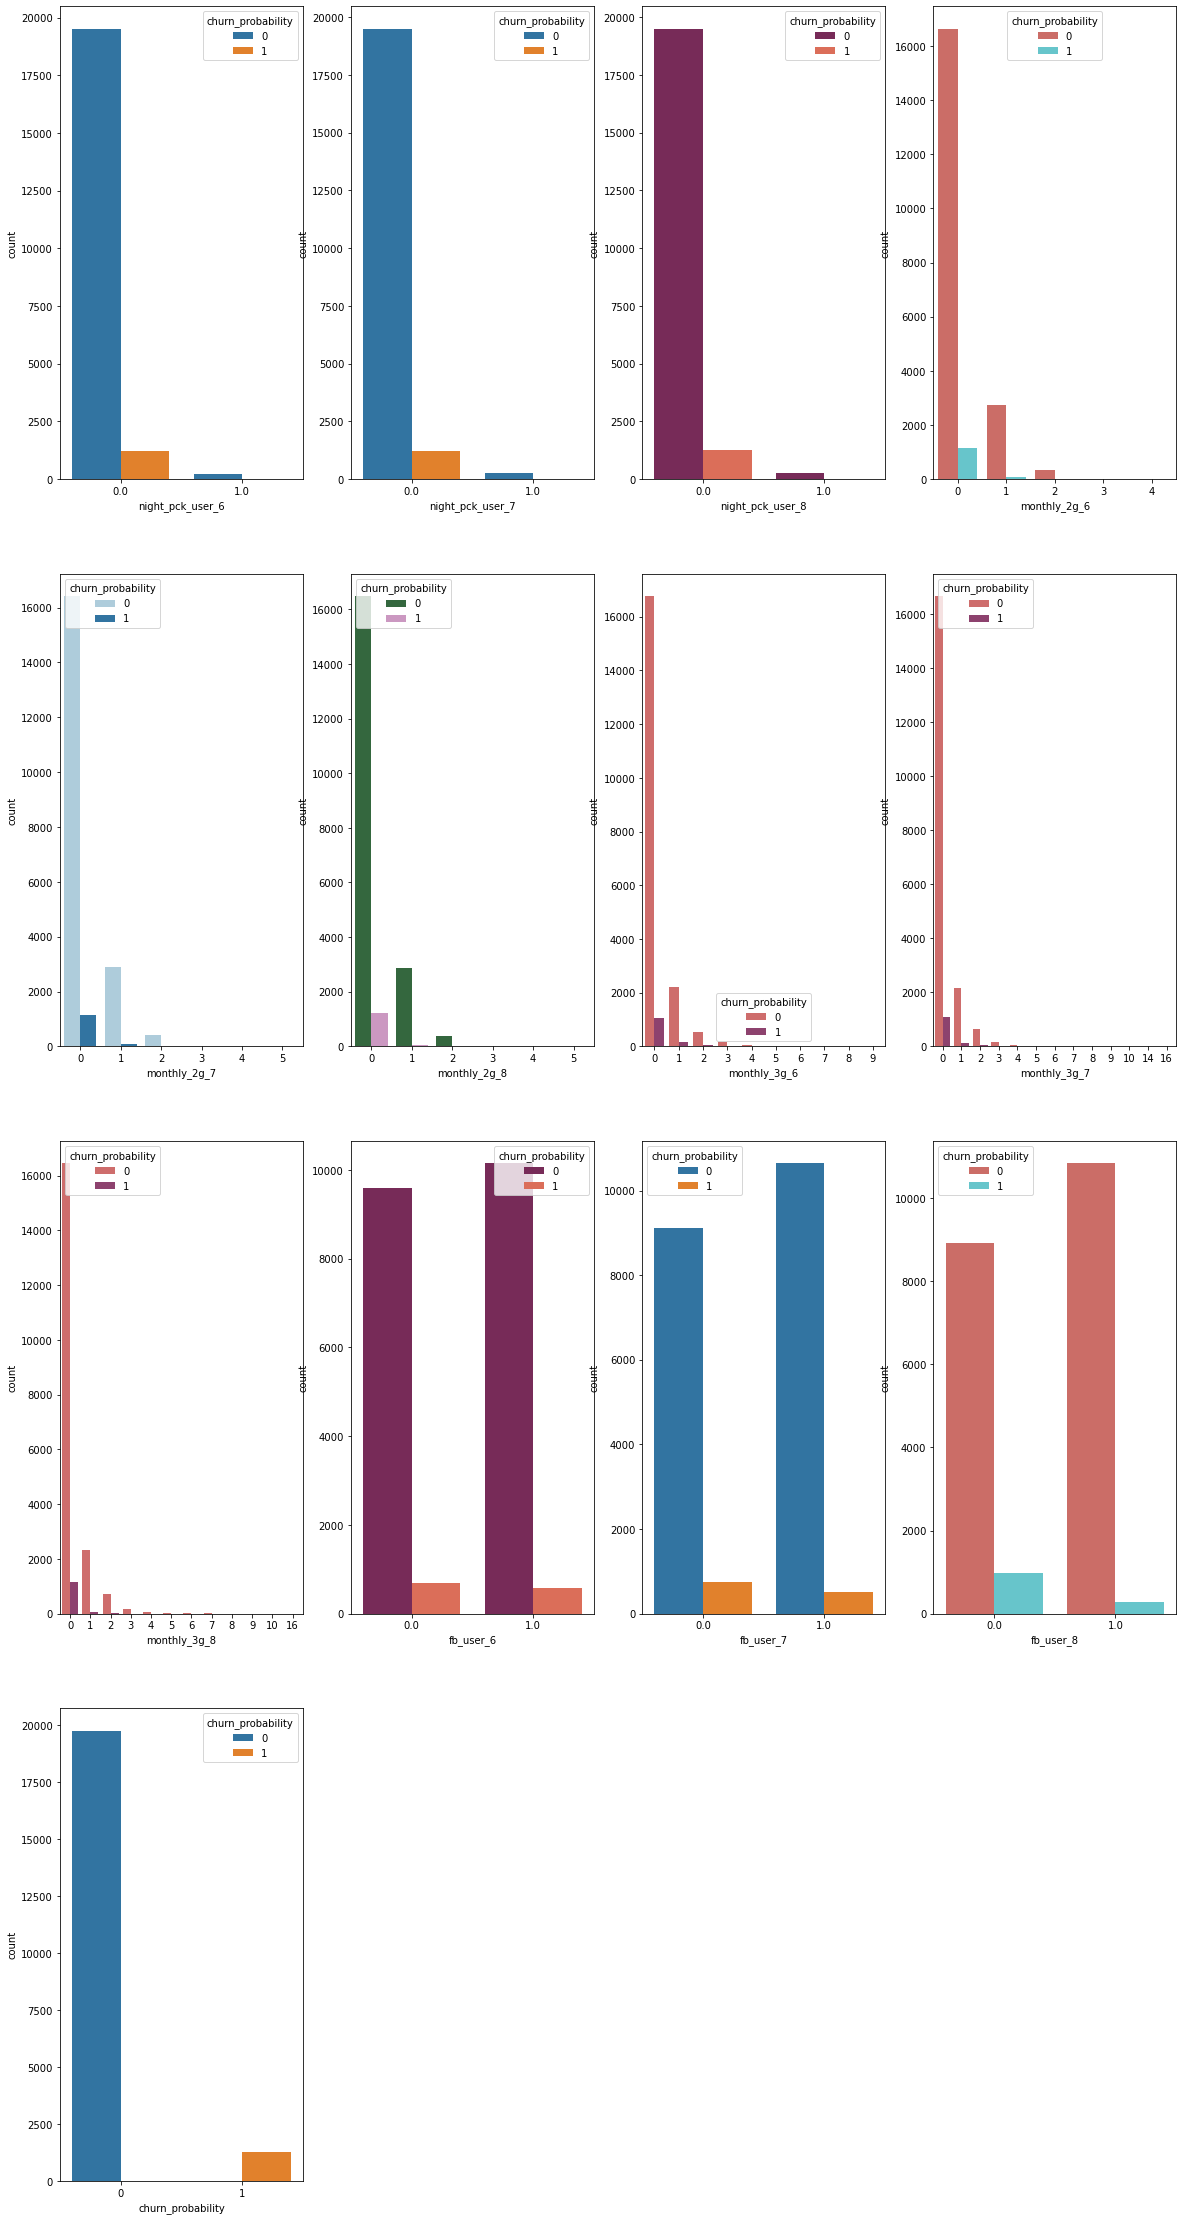

In [39]:
plt.figure(figsize=(20, 40))
r=1
pal=["tab10","hls","husl","Set2","Paired","flare","rocket","cubehelix"]
for c in catcols:
    plt.subplot(4,4,r)
    sns.countplot(data=highValue_df,x=c,hue='churn_probability',palette=random.choice(pal))
    r=r+1
plt.show()

### Data shows us the following data .
* customers that use data are less likely to churn
* customers who use social media have a lower probabilty of churning
* customers who use the night pack also have a lower churn probaility 


In [40]:
# Lets make some changes to data that make it more usable 
# We can make monthly useage as yes or no so 0 is no and any other value is yes


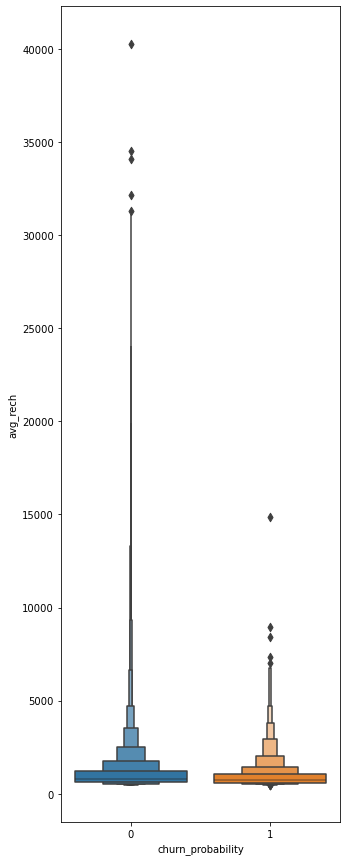

In [41]:
plt.figure(figsize=(5,15))
sns.boxenplot(data=highValue_df,x='churn_probability',y='avg_rech')
plt.show()

In [42]:
r=churn_df[num_cols].corr()


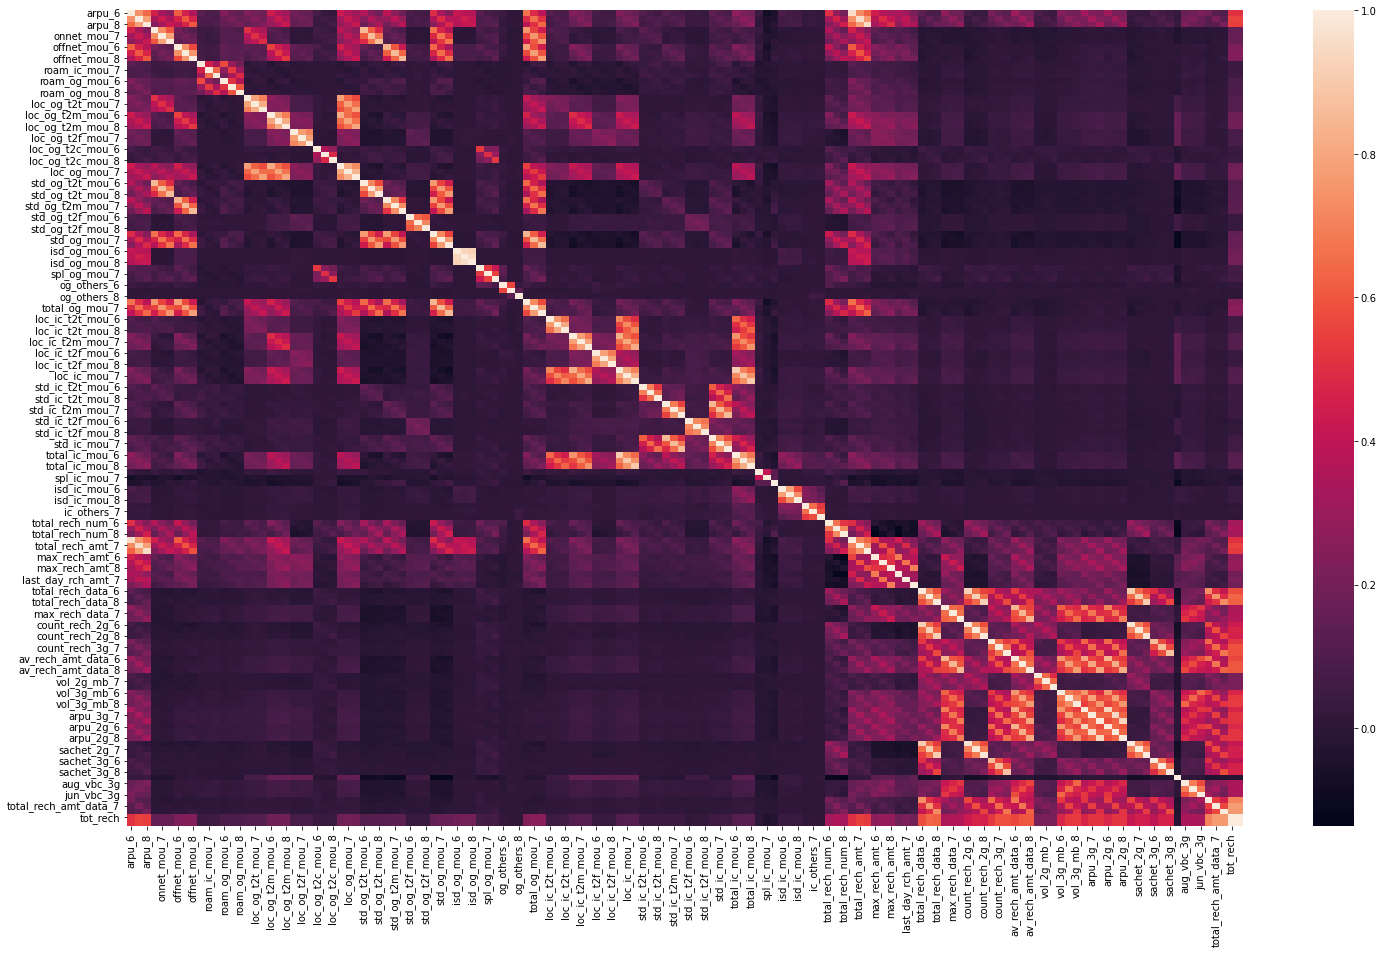

In [43]:
plt.figure(figsize=(25,15))
sns.heatmap(r,)
plt.show()

In [45]:
# we see a lot of hightly correlated colums


# Model building
### We need to make 2 copies of the data 1 with PCA and the other as it is so that we can find good final output and also find the important featues 

In [47]:
# importing important libs for ML 
#from sklearn import  linear_model
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.metrics import explained_variance_score
#Importing the PCA module
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [48]:
y=churn_df.churn_probability
X=churn_df.drop('churn_probability',axis=1)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [56]:
display(Markdown("#### Train Data shape:"+str(x_train.shape)))
display(Markdown("#### Test Data shape:"+str(x_test.shape)))

#### Train Data shape:(52499, 162)

#### Test Data shape:(17500, 162)

# PCA on data

In [58]:
pca= PCA(random_state=100)
x_train_pca = pca.fit_transform()

TypeError: float() argument must be a string or a number, not 'Timestamp'